In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)

In [51]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.contaniner { width:100% !important;}</style>"))
pd.options.display.max_columns = 999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E611B55A48>,
      dtype=object)

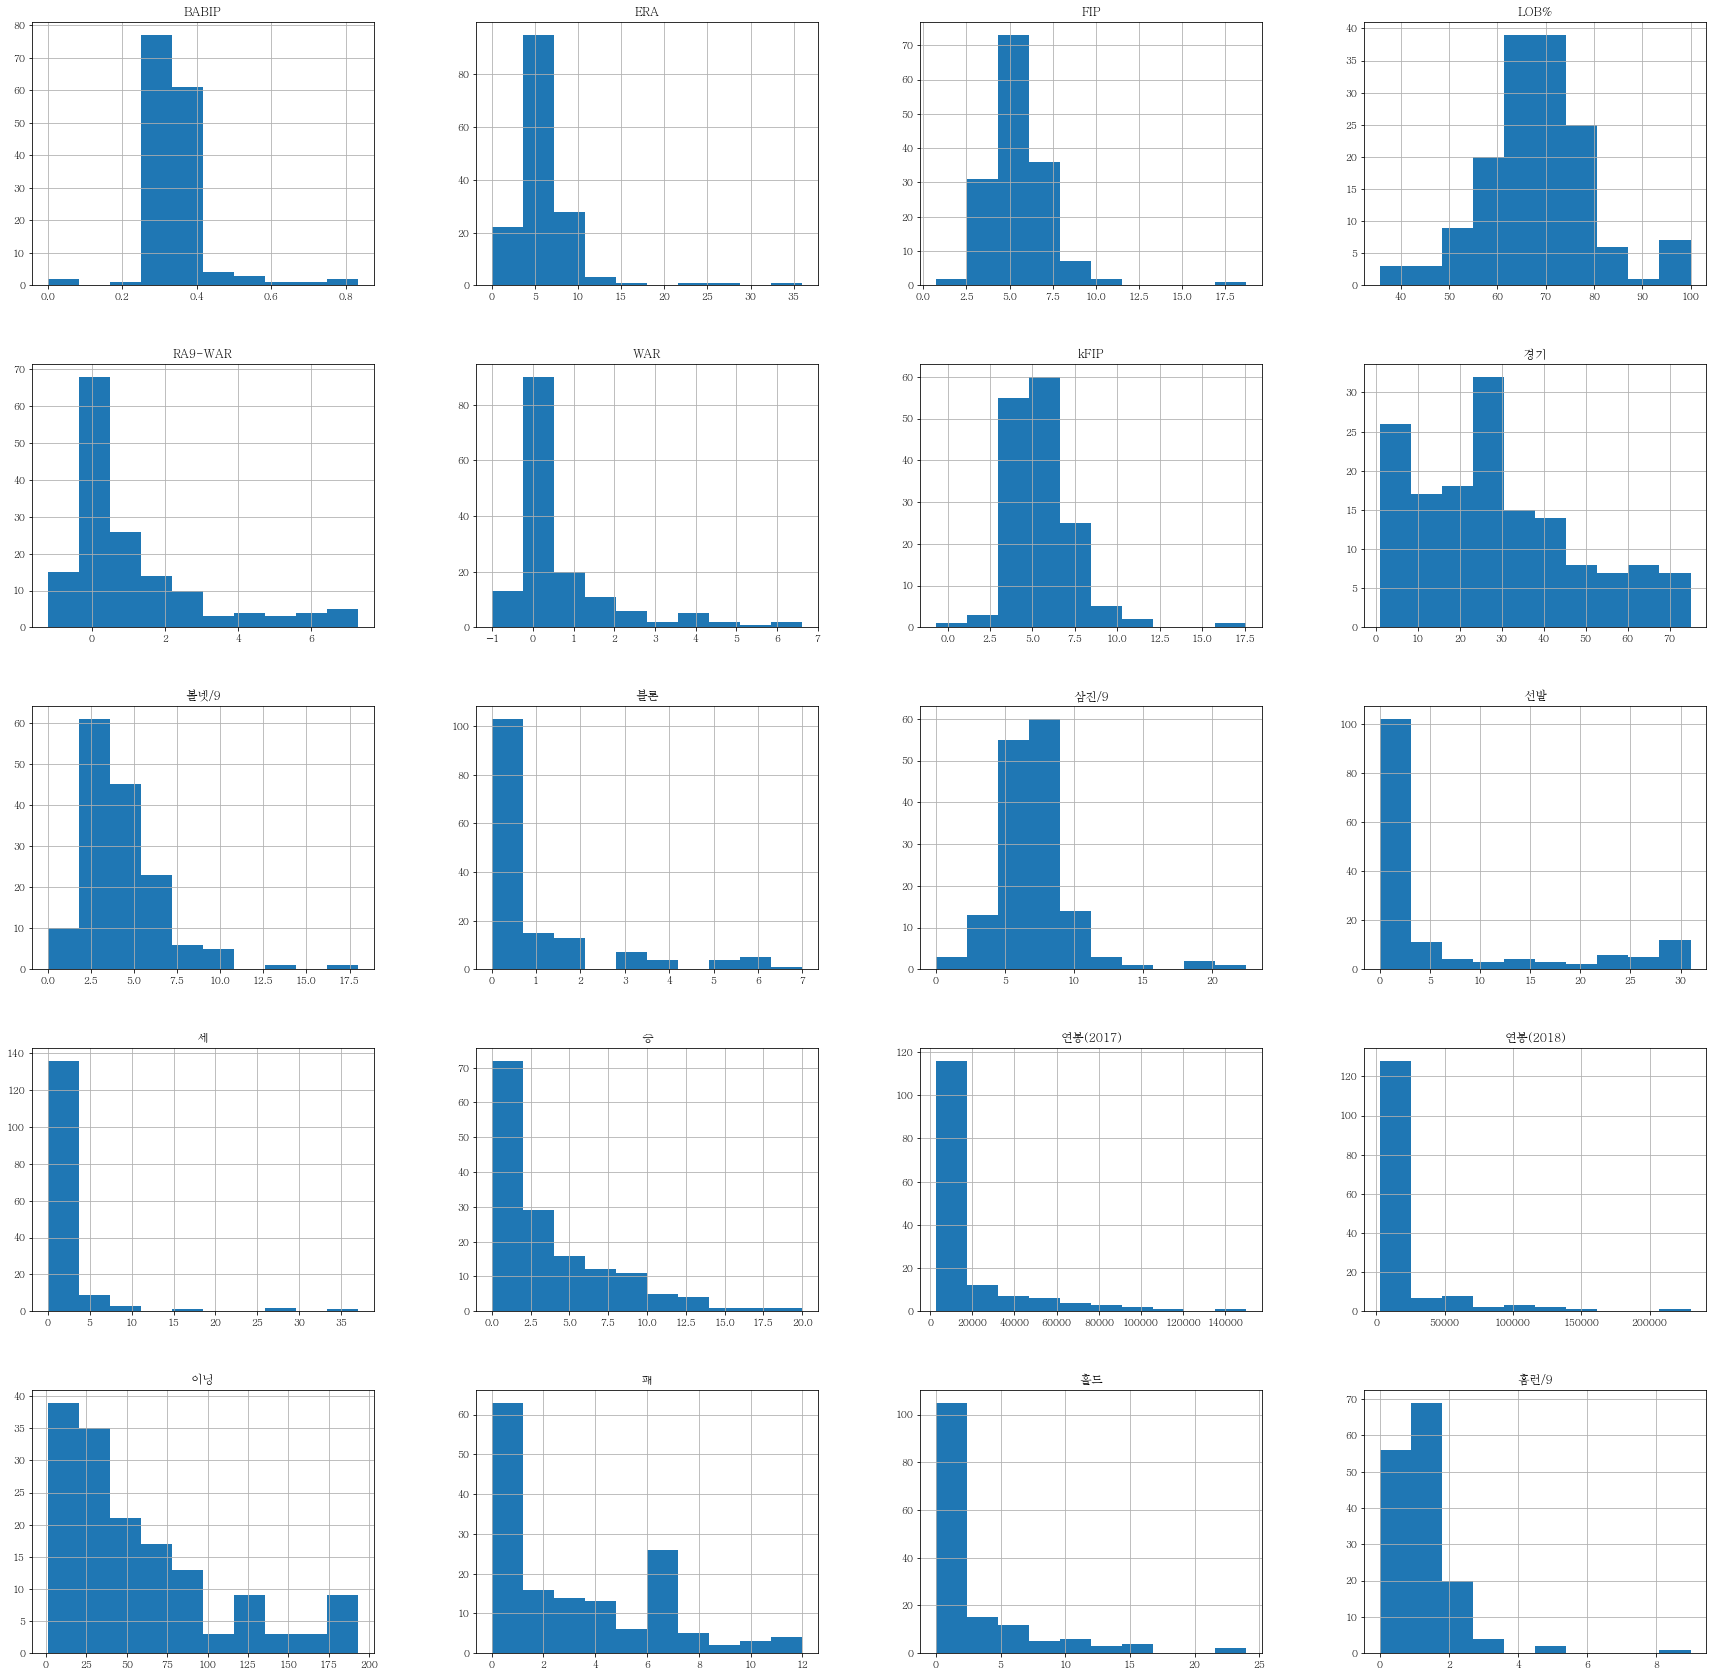

In [53]:
picher.hist(figsize=(30,30))

In [54]:
import matplotlib as mpl
# 현재 OS 내에 설치된 폰트를 확인합니다.
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
mpl.rc('font', family='Batang')

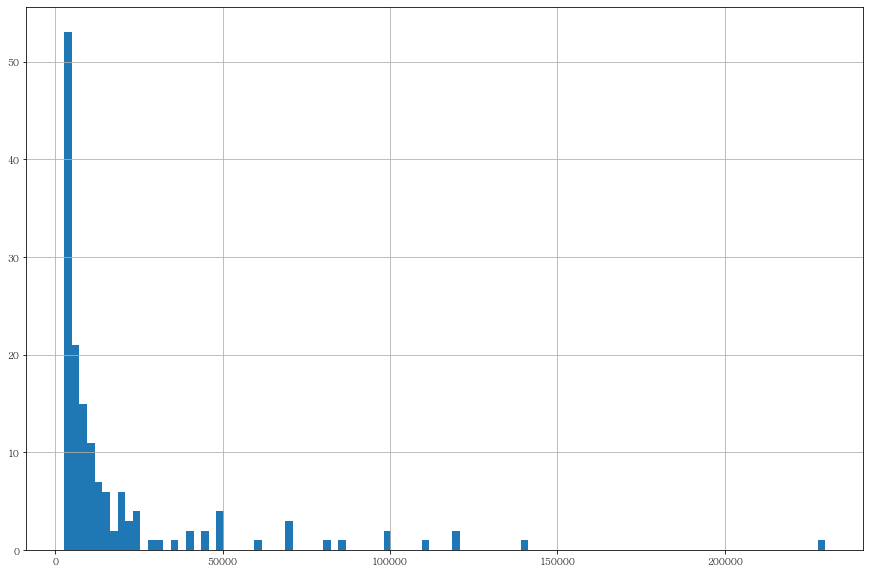

In [55]:
picher['연봉(2018)'].hist(bins=100)

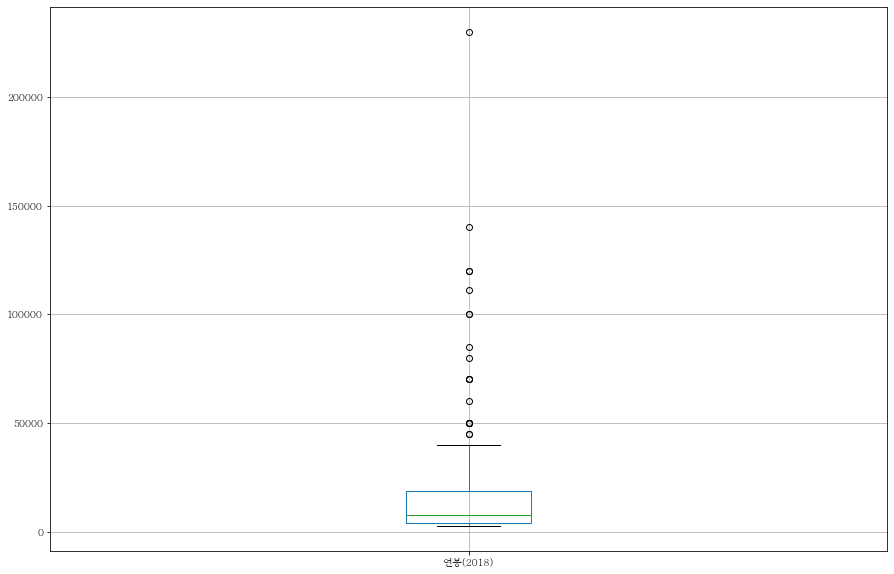

In [56]:
picher.boxplot(column=['연봉(2018)'])

피처 각각에 대한 스케일링

In [57]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [58]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,-0.373829,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,KIA,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,0.603817,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,롯데,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,0.307561,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,삼성,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,1.196330,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


In [59]:
picher_df=picher_df.rename(columns={'연봉(2018)' : 'y'})
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,-0.373829,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,KIA,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,0.603817,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,롯데,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,0.307561,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,삼성,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,1.196330,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


## 1.선수명: 선수의 이름은 연봉에 영향을 끼치지 않음으로 삭제

In [60]:
picher_df = picher_df.drop('선수명', axis=1)

## 팀명: 해당 행이 어떤 팀이냐를 0 or 1로 구분

In [61]:
team_encoding = pd.get_dummies(picher_df['팀명'])

#더미로 만든 뒤 '팀명'은 필요가 없어졌으니 삭제
picher_df = picher_df.drop('팀명', axis=1)
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [62]:
picher_df = picher_df.join(team_encoding)
picher_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0
1,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0
2,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0
3,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0
4,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,-0.373829,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587,0,0,0,0,0,0,0,0,1
148,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,0.603817,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215,1,0,0,0,0,0,0,0,0
149,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,0.307561,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173,0,0,0,0,0,0,1,0,0
150,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,1.196330,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201,0,0,0,0,0,0,0,1,0


In [63]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
#'선수명', 'y'를 제외한 칼럼들은 X
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]

y = picher_df['y']

#검증(test)는 20%로 한다. = test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [64]:
# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력합니다.
print(lr.coef_)



[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [65]:
# 상수항을 출력합니다.
print(lr.intercept_)

18640.47296454434


In [66]:
x_new=X_test
y_new=model.predict(x_new)

In [67]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [80]:
y_compare={'y_test':y_test, 'y_predicted':y_new}
y_compare = pd.DataFrame(y_compare)
y_compare

,y_test,y_predicted
2,230000,159263.118960
42,19000,7835.918557
100,3100,7269.884623
124,5200,249.904435
27,18800,21972.721167
7,100000,112188.311038
8,16000,35624.893233
136,3000,5088.533300
142,9000,4752.309581
37,23000,23305.179720


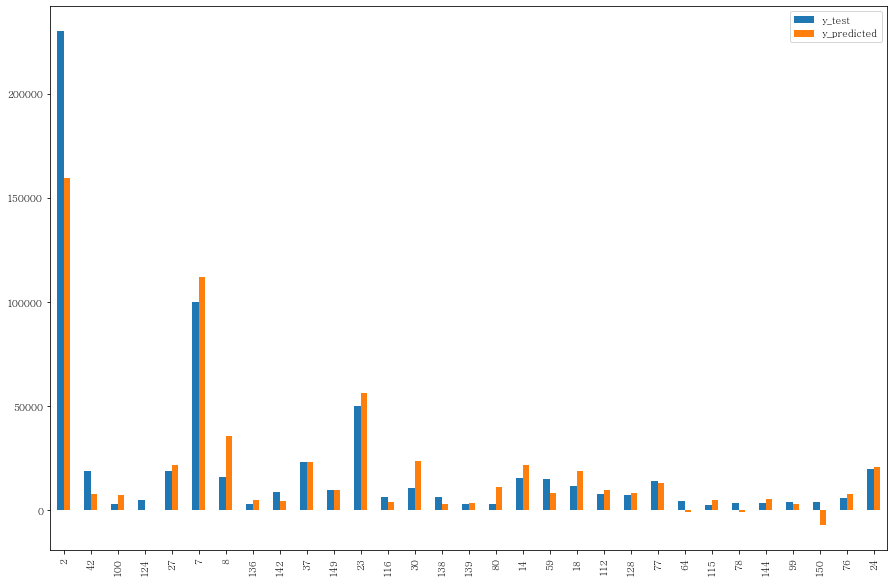

In [69]:
mpl.rc('font', family='Batang')
y_compare.plot(y=['y_test', 'y_predicted'], kind="bar")

- R2 Score(결정계수) : 실제값, 예측값, 평균값 사이의 편차를 점수로 매긴 것
- RMSE Score(평균제곱근 오차) : Root Mean Square Error.

In [70]:
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977818


둘의 차이를 찾아봤는데, RMSE는 데이터의 크기에 따라 천차만별의 SCORE가 나오기에 판단하기에 어려움이 있다고 합니다. 보통은 R2의 성능평가를 신빙성있게 사용한다고 합니다. 

In [71]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다

7282.718684746374
14310.69643688913


In [81]:
picher_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,예측연봉(2018)
0,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0,104977.650077
1,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0,75391.182536
2,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0,156871.977522
3,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0,113224.450078
4,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0,100984.091630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,-0.373829,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587,0,0,0,0,0,0,0,0,1,468.375949
148,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,0.603817,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215,1,0,0,0,0,0,0,0,0,4048.386933
149,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,0.307561,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173,0,0,0,0,0,0,1,0,0,8906.407151
150,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,1.196330,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201,0,0,0,0,0,0,0,1,0,118.500415


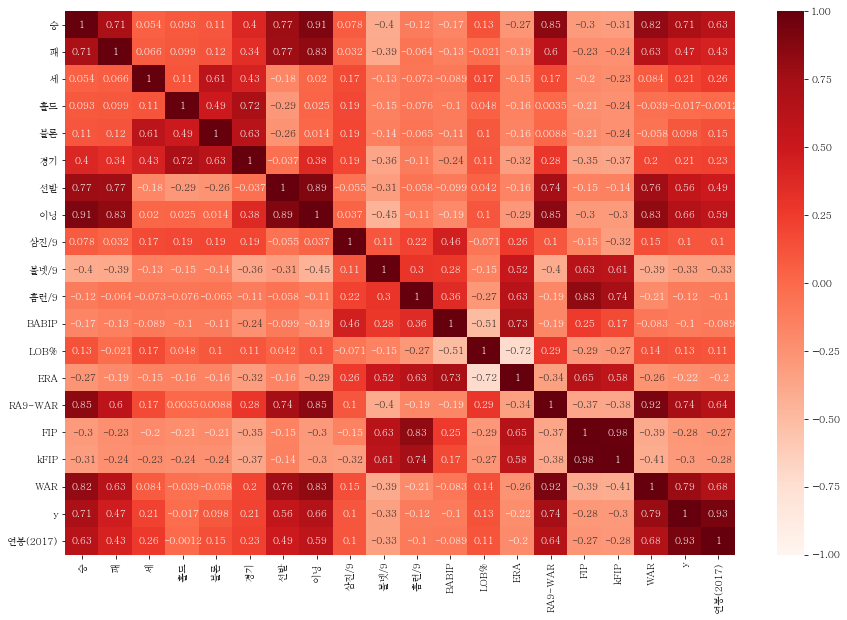

In [72]:
import seaborn as sb
picher_df_corr=picher_df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(picher_df_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

## 상관관계가 강한 feature들이 가지고 있는 다중공선성이 어느정도 인지 확인하기

heatmap으로 보니 1, 혹은 -1에 가까운 상관계수값이 많이 보입니다. 

상관관계가 강한 feature들이 가지고 있는 다중공선성이 어느정도인지를 확인해보겠습니다.

 

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF입니다.

VIF (Variance inflation Factors 분산팽창요인)

안전 : VIF < 5

주의 : 5 < VIF < 10

위험 : 10 < VIF



In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,7.733989,승
1,5.301088,패
2,3.037209,세
3,3.636067,홀드
4,2.760823,블론
5,14.227864,경기
6,36.258907,선발
7,60.356532,이닝
8,78.720067,삼진/9
9,50.744095,볼넷/9


1. VIF 계수가 높은 feature제거

2. 단 유사한 feature의 경우, 둘 중 1개만 제거(FIP, kFIP의 경우)

3. 제거 후 VIF계수 재출력

4. (1, 2, 3)의 과정 반복

5. 회귀분석 진행

6. feature의 p-value점검

In [74]:
picher_df_corr=picher_df_corr.drop(['홈런/9','kFIP',], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,7.723053,승
1,5.184559,패
2,3.031897,세
3,3.627584,홀드
4,2.751881,블론
5,14.033415,경기
6,36.184654,선발
7,59.397901,이닝
8,1.970108,삼진/9
9,2.242059,볼넷/9


In [75]:
picher_df_corr=picher_df_corr.drop(['선발','이닝'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,6.726720,승
1,2.309031,패
2,2.572371,세
3,2.925249,홀드
4,2.666419,블론
5,5.020910,경기
6,1.966439,삼진/9
7,2.217200,볼넷/9
8,3.091305,BABIP
9,3.821809,LOB%


In [76]:
picher_df_corr_re=picher_df_corr[['승', '패', '세', '홀드', '블론', '경기', '삼진/9', '볼넷/9', 'BABIP', 'LOB%',
       'ERA', 'RA9-WAR', 'FIP', 'WAR', 'y', '연봉(2017)']]
       
X=picher_df_corr_re[picher_df_corr_re.columns.difference(['y'])]
y=picher_df_corr_re['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)


lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9198828535887997
0.8903408018350579


In [77]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     80.37
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.07e-50
Time:                        16:19:21   Log-Likelihood:                -1254.0
No. Observations:                 121   AIC:                             2540.
Df Residuals:                     105   BIC:                             2585.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.871e+04    755.008     24.782      0.000    1.72e+04    2.02e+04
BABIP      -1178.2459   1234.042     -0.955      0.342   -3625.122    1268.631
ERA           43.8550   2152.308      0.020      0.984   -4223.774    4311.484
FIP          823.8729   1435.618      0.574      0.567   -2022.693    3670.438
LOB%        -764.6410   1397.445     -0.547      0.585   -3535.516    2006.234
RA9-WAR     2461.4652   2568.108      0.958      0.340   -2630.619    7553.549
WAR         1.055e+04   2385.139      4.424      0.000    5821.615    1.53e+04
경기          -946.5905   1731.668     -0.547      0.586   -4380.168    2486.987
볼넷/9         407.7724   1116.116      0.365      0.716   -1805.279    2620.824
블론          1919.4190   1163.399      1.650      0.102    -387.387    4226.225
삼진/9         -53.3431    979.118     -0.054      0.957   -1994.753    1888.067
세             70.9891   1162.030      0.061      0.951   -2233.103    2375.081
승          -1414.2466   2016.735     -0.701      0.485   -5413.059    2584.566
연봉(2017)    1.909e+04   1159.090     16.473      0.000    1.68e+04    2.14e+04
패           -337.3497   1201.361     -0.281      0.779   -2719.427    2044.727
홀드           -59.6546   1395.566     -0.043      0.966   -2826.804    2707.494
==============================================================================
Omnibus:                       34.646   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.381
Skew:                          -0.544   Prob(JB):                     4.87e-67
Kurtosis:                      10.706   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
picher_df_corr_re=picher_df_corr[['BABIP','RA9-WAR','블론','연봉(2017)','y']]
X=picher_df_corr_re[picher_df_corr_re.columns.difference(['y'])]
y=picher_df_corr_re['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.898999287510141
0.884277782465106


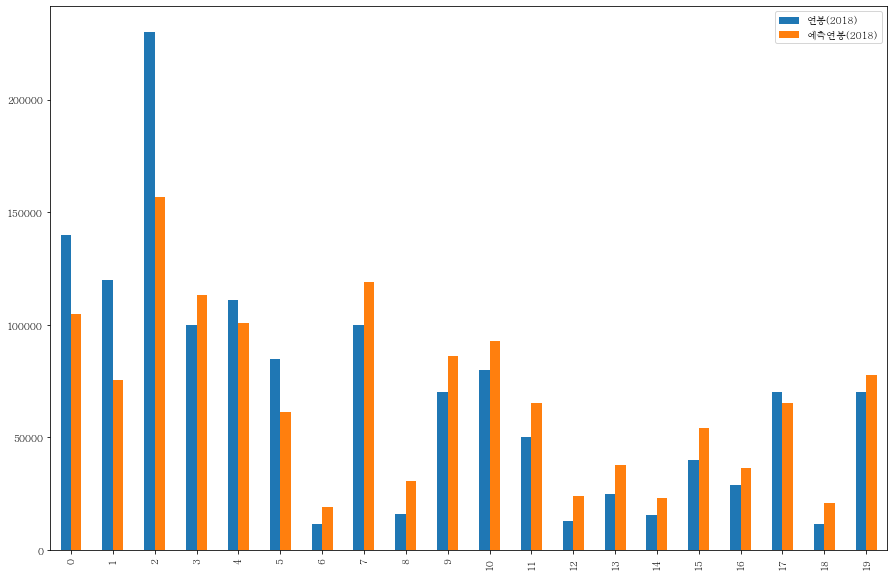

In [79]:
temp_picher_df=pd.read_csv(picher_file_path)

X=picher_df[['BABIP','RA9-WAR','블론','연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)
y_compare={'연봉(2018)':temp_picher_df['연봉(2018)'],'예측연봉(2018)':picher_df['예측연봉(2018)']}
y_compare=pd.DataFrame(y_compare)

y_compare_10 = y_compare.head(20)
mpl.rc('font', family='Batang')
y_compare_10.plot(y=['연봉(2018)', '예측연봉(2018)'], kind="bar")